<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

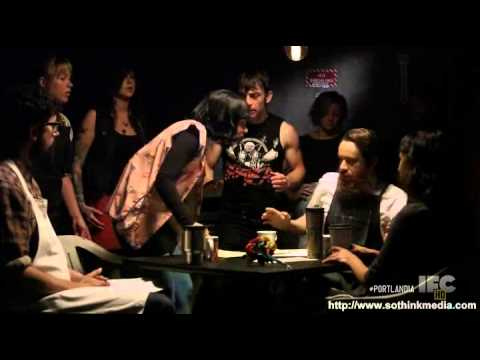

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [119]:
%pwd

'C:\\Users\\johnt\\unit3\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
# analyze the shape
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
# Notice anything odd here? - lots of different shops  
shops['coffee_shop_name'].value_counts(normalize=True)[:50]

Epoch Coffee                       0.052521
Halcyon                            0.039391
The Factory - Cafe With a Soul     0.032038
Venezia Italian Gelato             0.026261
Houndstooth Coffee                 0.026261
Caffé Medici                       0.018776
Apanas Coffee & Beer               0.017857
Summermoon Coffee Bar              0.013130
TOMS                               0.013130
Sa-Ten                             0.013130
Once Over Coffee Bar               0.013130
Russell’s Bakery                   0.013130
La Tazza Fresca                    0.013130
Cream Whiskers                     0.013130
Cuvée Coffee Bar                   0.013130
Figure 8 Coffee Purveyors          0.013130
Cenote                             0.013130
Live Oak Market                    0.013130
Teo                                0.013130
The Buzz Mill                      0.013130
Radio Coffee & Beer                0.013130
Quack’s 43rd Street Bakery         0.013130
Sorrento’s Coffee               

In [3]:
# Much cleaner - made lower case from notes
shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda x: x.lower())
shops['coffee_shop_name'].value_counts(normalize=True)[:50]

epoch coffee                       0.052521
halcyon                            0.039391
the factory - cafe with a soul     0.032038
houndstooth coffee                 0.026261
venezia italian gelato             0.026261
caffé medici                       0.018776
apanas coffee & beer               0.017857
cherrywood coffeehouse             0.013130
the hideout coffeehouse            0.013130
corona coffee                      0.013130
hot mama’s cafe                    0.013130
café crème                         0.013130
teo                                0.013130
stinson’s                          0.013130
patika                             0.013130
café java                          0.013130
lola savannah coffee lounge        0.013130
sa-ten                             0.013130
flightpath coffeehouse             0.013130
thunderbird coffee                 0.013130
picnik austin                      0.013130
arturo’s underground cafe          0.013130
anderson’s coffee company       

In [4]:
# whats the types
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_shop_name  7616 non-null   object
 1   full_review_text  7616 non-null   object
 2   star_rating       7616 non-null   object
dtypes: object(3)
memory usage: 178.6+ KB


In [5]:
# How can we count the raw text? - all reviews are unique
shops['full_review_text'].value_counts(normalize=True)[:5]

 11/9/2016 Really cute and heavily hipster atmosphere. We tried this place late night on Saturday and enjoyed the first visit. You will want to try their swing for sure. Seating space is somewhat limited and no wifi is available, so be aware. This is more like a place for you to enjoy its atmosphere. Drinks were good, though make sure you have enough in your bank account because their drinks are probably not for broke college students. That swing!     0.000525
 11/14/2016 Enthusiastic and earnest desire to be excellent, try new things and develop new menu ideas, smiles, not in your face - best almond pound cake I've ever had (worth the 5 stars alone), and a fantastic cup of red rooibos iced tea.  next to Hanabi.  fantastic new spot.                                                                                                                                                                                   0.000525
 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!

In [10]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z]', ' ', text)
    tokens = tokens.lower().split()
    tokens = [x.strip(' ') for x in tokens]
    
    return tokens
shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens']

0       [check, in, love, love, loved, the, atmosphere...
1       [listed, in, date, night, austin, ambiance, in...
2       [check, in, listed, in, brunch, spots, i, love...
3       [very, cool, decor, good, drinks, nice, seatin...
4       [check, in, they, are, located, within, the, n...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok, the, steeping, room, is, awesome, how, do...
7613    [loved, coming, here, for, tea, and, the, atmo...
7614    [the, food, is, just, average, the, booths, di...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: tokens, Length: 7616, dtype: object

In [11]:
#see the difference
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[check, in, love, love, loved, the, atmosphere..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[listed, in, date, night, austin, ambiance, in..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[check, in, listed, in, brunch, spots, i, love..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[very, cool, decor, good, drinks, nice, seatin..."
4,12/3/2016 1 check-in They are located within ...,"[check, in, they, are, located, within, the, n..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[check, in, very, cute, cafe, i, think, from, ..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[check, ins, listed, in, nuptial, coffee, blis..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[check, ins, love, this, place, stars, for, cl..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[check, in, ok, let, s, try, this, approach, p..."
9,11/10/2016 3 check-ins This place has been sh...,"[check, ins, this, place, has, been, shown, on..."


In [12]:
## Object from Base Python - ten most common words one is coffee so thats good
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34909),
 ('and', 26774),
 ('i', 24630),
 ('a', 22857),
 ('to', 17345),
 ('it', 12693),
 ('of', 12638),
 ('is', 12004),
 ('in', 11609),
 ('coffee', 10572)]

In [13]:
shops['tokens'].count

<bound method Series.count of 0       [check, in, love, love, loved, the, atmosphere...
1       [listed, in, date, night, austin, ambiance, in...
2       [check, in, listed, in, brunch, spots, i, love...
3       [very, cool, decor, good, drinks, nice, seatin...
4       [check, in, they, are, located, within, the, n...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok, the, steeping, room, is, awesome, how, do...
7613    [loved, coming, here, for, tea, and, the, atmo...
7614    [the, food, is, just, average, the, booths, di...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: tokens, Length: 7616, dtype: object>

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
#Overall Word / Token Count
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [15]:
# Use the Function
wc = count(shops['tokens'])

In [17]:
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,the,6854,34909,1.0,0.044008,0.044008,0.899947
30,and,6869,26774,2.0,0.033753,0.077761,0.901917
8,i,5877,24630,3.0,0.031050,0.108810,0.771665
53,a,6250,22857,4.0,0.028815,0.137625,0.820641
70,to,5676,17345,5.0,0.021866,0.159491,0.745273
51,it,4924,12693,6.0,0.016001,0.175492,0.646534
50,of,5108,12638,7.0,0.015932,0.191424,0.670693
73,is,4998,12004,8.0,0.015133,0.206557,0.656250
72,in,5291,11609,9.0,0.014635,0.221192,0.694722
9,coffee,4924,10572,10.0,0.013328,0.234520,0.646534


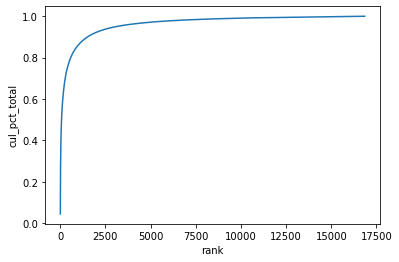

In [18]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [19]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.55553468483176

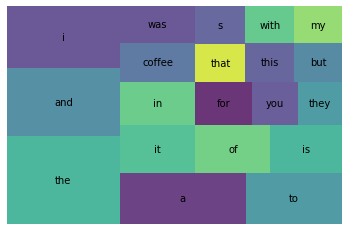

In [20]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [21]:
#View Counts by Rating
shops['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [22]:
# check formating od text in star rating for determination
shops['star_rating'][2]

' 4.0 star rating '

In [23]:
#Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.
shops['determination'] = ["good" if star_rating == ' 5.0 star rating ' else "good" if star_rating == ' 4.0 star rating ' else "bad" for star_rating in shops['star_rating']]
shops['determination'].value_counts(normalize=True)

good    0.806197
bad     0.193803
Name: determination, dtype: float64

In [138]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,determination
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,...",good
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb...",good
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo...",good
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni...",bad
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with...",good


In [24]:
# created new dataframes using ratings with determination either bad or good
shopsgood = shops[shops.determination.str.contains('good', case=False)]
shopsbad = shops[shops.determination.str.contains('bad', case=False)]

In [28]:
# top 20 words for shops with good rating
word_counts = Counter()
shopsgood['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(30)

[('the', 26690),
 ('and', 21405),
 ('i', 18287),
 ('a', 17774),
 ('to', 12907),
 ('of', 9964),
 ('is', 9648),
 ('it', 9522),
 ('in', 9202),
 ('coffee', 8397),
 ('was', 6777),
 ('for', 6623),
 ('you', 5619),
 ('they', 5357),
 ('s', 5343),
 ('this', 5143),
 ('with', 5048),
 ('that', 4845),
 ('my', 4685),
 ('but', 4656),
 ('place', 4330),
 ('on', 4136),
 ('have', 3971),
 ('so', 3568),
 ('are', 3510),
 ('t', 3473),
 ('great', 3473),
 ('good', 3120),
 ('their', 2890),
 ('check', 2852)]

In [29]:
# top 20 words for shops with bad rating
word_counts = Counter()
shopsbad['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(30)

[('the', 8219),
 ('i', 6343),
 ('and', 5369),
 ('a', 5083),
 ('to', 4438),
 ('it', 3171),
 ('was', 2935),
 ('of', 2674),
 ('in', 2407),
 ('is', 2356),
 ('coffee', 2175),
 ('for', 2072),
 ('but', 1931),
 ('that', 1824),
 ('t', 1678),
 ('my', 1527),
 ('this', 1467),
 ('not', 1436),
 ('they', 1393),
 ('you', 1370),
 ('s', 1311),
 ('with', 1299),
 ('on', 1154),
 ('place', 1118),
 ('so', 1074),
 ('have', 1051),
 ('there', 934),
 ('be', 915),
 ('like', 887),
 ('good', 883)]

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [27]:
# created new dataframes using ratings with determination either bad or good
shops_goodbad = pd.concat([shopsgood,shopsbad])
shops_goodbad['determination'].value_counts(normalize=True)

good    0.806197
bad     0.193803
Name: determination, dtype: float64

In [46]:
# Rel. freq. instead of absolute counts b/c of different numbers of reviews


In [139]:
# Only look at the top 5-10 words with the greatest differences - get rid of stop words
import spacy

nlpl = spacy.load("en_core_web_lg")

In [30]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [47]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops.tokens.head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

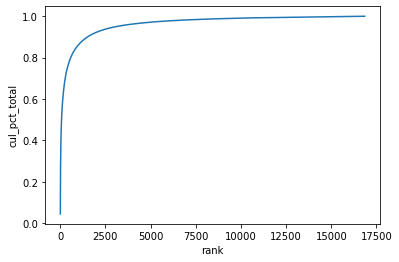

In [32]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [33]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.55553468483176

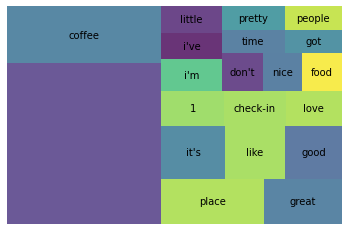

In [34]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [48]:
#Custom stopword removal
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee',' ', 'place', "it's", 'food' ,'time', 'order', 'asked', "i've","1","i'm","-","it.","customer"])

In [49]:
tokens = []

for doc in tokenizer.pipe(shopsgood['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shopsgood['tokens'] = tokens

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [50]:
tokens = []

for doc in tokenizer.pipe(shopsbad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shopsbad['tokens'] = tokens

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [51]:
# Bad coffe shos words - feel like don't is the giveway difference for bad coffee shops
wc = count(shopsbad['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,like,548,834,1.0,0.010074,0.010074,0.371274
35,good,441,599,2.0,0.007235,0.017309,0.298780
186,don't,340,430,3.0,0.005194,0.022504,0.230352
68,check-in,359,359,4.0,0.004336,0.026840,0.243225
180,pretty,278,349,5.0,0.004216,0.031056,0.188347
136,great,264,348,6.0,0.004204,0.035259,0.178862
504,people,247,327,7.0,0.003950,0.039209,0.167344
38,service,261,314,8.0,0.003793,0.043002,0.176829
19,got,237,300,9.0,0.003624,0.046626,0.160569
371,ordered,240,296,10.0,0.003575,0.050201,0.162602


In [52]:
# good coffe shos words - great, like, love giveway differences
wc = count(shopsgood['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
131,great,2174,2902,1.0,0.009916,0.009916,0.354072
298,good,1643,2180,2.0,0.007449,0.017364,0.267590
214,like,1486,2068,3.0,0.007066,0.024430,0.242020
22,love,1263,1604,4.0,0.005481,0.029911,0.205700
34,check-in,1598,1602,5.0,0.005474,0.035384,0.260261
603,little,1027,1230,6.0,0.004203,0.039587,0.167264
232,nice,962,1101,7.0,0.003762,0.043349,0.156678
418,best,951,1093,8.0,0.003735,0.047083,0.154886
196,friendly,986,1014,9.0,0.003465,0.050548,0.160586
65,austin,875,1013,10.0,0.003461,0.054009,0.142508


### - Visualize difference

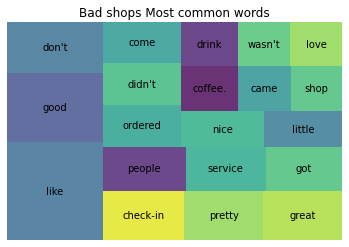

In [57]:
# Bad shops viz
wc = count(shopsbad['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.title('Bad shops Most common words')
plt.axis('off')
plt.show()

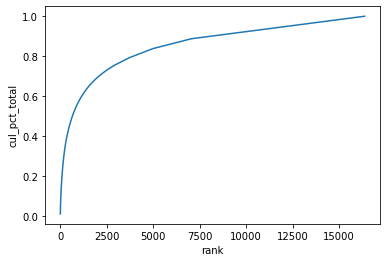

In [58]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

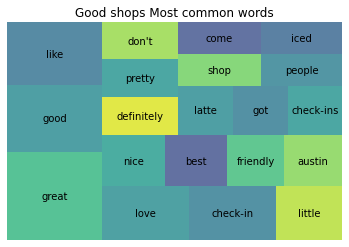

In [59]:
# Good shops viz
wc = count(shopsgood['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.title('Good shops Most common words')
plt.axis('off')
plt.show()

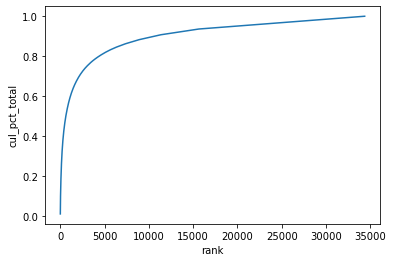

In [60]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 



### - Add classification problem that predict rating of coffee shop